**Bu notebook, projede oluşturulan Klasik Makine Öğrenmesi modellerinin holdout(25-75) yöntemle testi ve skorların görselleştirilmesi için oluşturulmuştur.**

#Hazırlık

**Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


**Load**

In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/Fake.csv")
real = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/True.csv")

**PRE-PROCESSING**

Helper Functions

In [ ]:
def clean(text):
    text = re.sub('[^a-zA-Z-@]', ' ', text)
    text = text.lower() #küçük harfe çevir
    text = text.split()
    text = ' '.join(text)
    return text

In [ ]:
#stemmer
ps = PorterStemmer()

def stemmer(text):
  text = text.split()
  text = [ps.stem(word) for word in text]
  text = ' '.join(text)
  #text = ps.stem(text)
  return text

In [ ]:
#stopword remover
nlp = spacy.blank('en')
def stopword(text):
    doc = nlp(text)
    clean_text = [token.text for token in doc if not token.is_stop]
    return " ".join(clean_text) #convert array to string



---



In [ ]:
real['label'] = 1
fake['label'] = 0

# remove prepended source from real news
cleantext = []

for item in real["text"]:
    text = item.partition(" - ")
    cleantext.append(text[2])
real["text"] = cleantext

df = pd.concat([real,fake])
df = df.sample(frac = 1, random_state=1) # SAMPLE SIZE

#drop columns
df = df.drop('title', axis=1)
df = df.drop('subject', axis=1)
df = df.drop('date', axis=1)

#regex cleaning and lowercase
df["text"] = df["text"].apply(clean)



In [ ]:
#removing stopwords
df['text'] = df['text'].apply(stopword)

# #stemming
df['stem'] = df['text'].apply(stemmer)

# #lemmatizing
# df['lemma'] = df['text'].apply(lemmatizer)

In [ ]:
#specifying dependent and independent variables
X = df['stem'] #text|stem|lemma
y = df['label']

In [ ]:
df.head()

,text,label,stem
4528,united states continue engaged international c...,1,unit state continu engag intern climat chang d...
10310,president trump tweeted new policy military co...,0,presid trump tweet new polici militari consult...
10937,u s republican presidential candidate donald t...,1,u s republican presidenti candid donald trump ...
13470,kremlin said thursday confident united states ...,1,kremlin said thursday confid unit state sancti...
19397,kellyanne conway s response williams criticism...,0,kellyann conway s respons william critic ve co...


In [ ]:
# testi verisini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

#MODEL SKORLARI

KNN model

In [ ]:
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('knn',KNeighborsClassifier(n_neighbors=1))
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0      0.728     0.952     0.825      5773
           1      0.925     0.624     0.745      5452

    accuracy                          0.793     11225
   macro avg      0.827     0.788     0.785     11225
weighted avg      0.824     0.793     0.786     11225



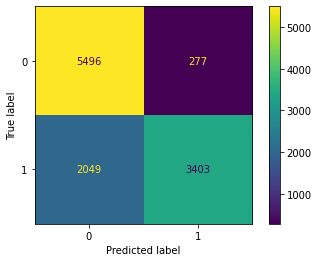

In [ ]:
print(classification_report(y_test, y_pred, digits =3))
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

Bayes Model

In [ ]:
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('mnb',MultinomialNB())
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0      0.914     0.938     0.926      5773
           1      0.933     0.907     0.920      5452

    accuracy                          0.923     11225
   macro avg      0.923     0.922     0.923     11225
weighted avg      0.923     0.923     0.923     11225



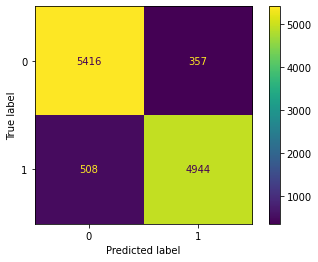

In [ ]:
print(classification_report(y_test, y_pred, digits =3))
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

Logistic Regression Model

In [ ]:
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('lr',LogisticRegression())
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0      0.975     0.975     0.975      5773
           1      0.973     0.974     0.973      5452

    accuracy                          0.974     11225
   macro avg      0.974     0.974     0.974     11225
weighted avg      0.974     0.974     0.974     11225



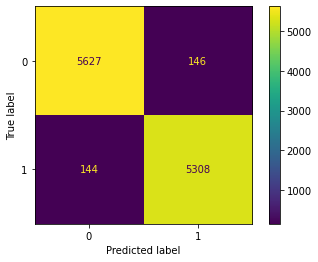

In [ ]:
print(classification_report(y_test, y_pred, digits =3))
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()